In [52]:
__author__ = "Zehra"
__version__ = "1.0.0"
__email__ = "fatmazehraortak@gmail.com"
__status__ = "Development"

# Installations

In [ ]:
!pip install requests --upgrade --quiet
!pip install beautifulsoup4 --upgrade --quiet
!pip install pandas --quiet
!pip install selenium


### Inspect Web Elements

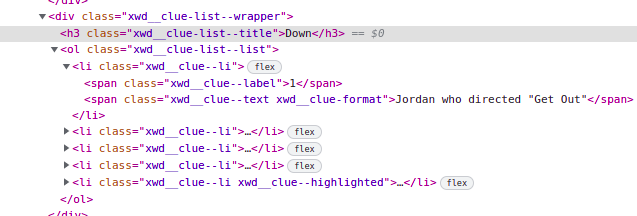

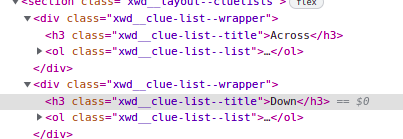

# 1. Selenium Solution

In [8]:
from selenium.webdriver.common.by import By
import pandas as pd
import requests
from time import sleep
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import pandas as pd
import time
from selenium import webdriver

In [44]:
my_url="https://www.nytimes.com/crosswords/game/mini"

In [45]:
driver = webdriver.Chrome('/usr/bin/chromedriver')
driver.get(my_url)
time.sleep(5)

In [46]:
#                                       <li class="xwd__clue--li">
clues = driver.find_elements_by_xpath('//span[@class="xwd__clue--text xwd__clue-format"]')

labels = driver.find_elements_by_xpath('//span[@class="xwd__clue--label"]')

In [47]:
clues_list = []
for p in range(len(clues)):
    clues_list.append(clues[p].text)
    
labels_list = []
for p in range(len(labels)):
    labels_list.append(labels[p].text)

In [48]:
for i in clues_list:
    print(i)

Opposite of fail
Jazz singer Fitzgerald
Payment with an A.T.M. card
College reunion attendee
Spider-Man pointing at Spider-Man, e.g.
Jordan who directed "Get Out"
Photo collection
Trail behind a snail
College entrance exam
Hoover ___


In [49]:
for i in labels_list:
    print(i)

1
5
6
7
8
1
2
3
4
6


In [50]:
for i in range(len(clues_list)):
    if(i==0):
        print("===Across===")
    if(i==(len(clues_list)/2)):
        print("===Down===")
    print(str(labels_list[i])+". "+clues_list[i])

===Across===
1. Opposite of fail
5. Jazz singer Fitzgerald
6. Payment with an A.T.M. card
7. College reunion attendee
8. Spider-Man pointing at Spider-Man, e.g.
===Down===
1. Jordan who directed "Get Out"
2. Photo collection
3. Trail behind a snail
4. College entrance exam
6. Hoover ___


# 2. BeautifulSoup Solution

In [53]:
from bs4 import BeautifulSoup
from bs4 import BeautifulSoup
from selenium import webdriver

my_url="https://www.nytimes.com/crosswords/game/mini"
driver = webdriver.Chrome("/usr/bin/chromedriver")
driver.get(my_url)
page_source = driver.page_source


soup = BeautifulSoup(page_source, 'lxml')
titles = []
clues=[]
clue_labels=[]

In [54]:


categories = soup.find_all('div', class_='xwd__clue-list--wrapper')
for category in categories:
    title = category.find('h3', class_='xwd__clue-list--title')
    parent_clues= category.find('ol', class_='xwd__clue-list--list xwd__clue-list--obscured')
    titles.append(title.text)
    if title is not None:
        print("==="+title.text+"===")
    for pc in parent_clues:
        clue_label = pc.find('span',"xwd__clue--label")
        clue       = pc.find('span',"xwd__clue--text xwd__clue-format")
        clue_labels.append(clue_label.text)
        clues.append(clue.text)
        print(str(clue_label.text)+". "+clue.text)
        
    

===Across===
1. Opposite of fail
5. Jazz singer Fitzgerald
6. Payment with an A.T.M. card
7. College reunion attendee
8. Spider-Man pointing at Spider-Man, e.g.
===Down===
1. Jordan who directed "Get Out"
2. Photo collection
3. Trail behind a snail
4. College entrance exam
6. Hoover ___


## Output
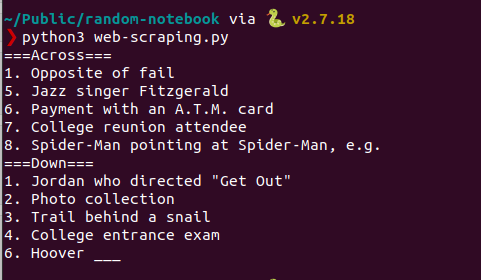

In [ ]:
#end the Selenium browser session
driver.quit()

In [56]:
import json
def create_dict():
    
    my_dict = {
            'Group': titles,
            'Number': clue_labels,
            'String': clues
        }
    return my_dict

my_dict=create_dict()

with open("sample.json", "w") as outfile:
    json.dump(my_dict, outfile)

## References

* https://towardsdatascience.com/how-to-use-selenium-to-web-scrape-with-example-80f9b23a843a

* https://medium.com/ymedialabs-innovation/web-scraping-using-beautiful-soup-and-selenium-for-dynamic-page-2f8ad15efe25

